## Импорты

In [1]:
soft_list = {'pandas': 'pd',
              'numpy': 'np',
              
              }          
   
for  package in soft_list.keys():                       
    exec(f'import {package} as {soft_list[package]}')   
    print(f'{package:<10} imported as {soft_list[package]}  version: {eval(soft_list[package]).__version__}')

pandas     imported as pd  version: 1.5.2
numpy      imported as np  version: 1.21.5


## CountVectorizer

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
import numpy as np

corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',]


In [3]:
vectorizer = CountVectorizer()              # Convert a collection of text documents to a matrix of token counts.
X = vectorizer.fit_transform(corpus)        # Learn the vocabulary dictionary and return document-term matrix.
print("Dense format:")
# print( X.toarray())                         # Return a dense ndarray representation of this matrix.
print(X.todense())                          # Return a dense matrix representation of this matrix.
print(vectorizer.get_feature_names_out())   # Transformed feature names

print("Sparse format:")
# display(X.nonzero())                        # Return the indices and values of the nonzero elements of a matrix or CSR matrix.
print('(row, col)    count')
print(X)
display(X)


Dense format:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
Sparse format:
(row, col)    count
  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	2
  (1, 5)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1


<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

n-граммы

In [4]:
vectorizer2 = CountVectorizer( ngram_range=(1, 2)) # default analyzer='word'
X2 = vectorizer2.fit_transform(corpus)
display(vectorizer2.get_feature_names_out())
print(X2.toarray())
X2.shape    # 4 rows, 13 - size of vocabulary 

array(['and', 'and this', 'document', 'document is', 'first',
       'first document', 'is', 'is the', 'is this', 'one', 'second',
       'second document', 'the', 'the first', 'the second', 'the third',
       'third', 'third one', 'this', 'this document', 'this is',
       'this the'], dtype=object)

[[0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 2 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0]
 [1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0]
 [0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1]]


(4, 22)

## TF-IDF (stands for Term Frequency-Inverse Document Frequency)


### $TF(t, d) = \frac{n_t}{\sum_{k} n_k} = \frac{\text{Number of times term t appears in document d}}{\text{Total number of terms in document d}} = \frac{word}{\sum{words}}$  
$t$ represents a term or `word`,  
and $d$ represents a `specific document`.  
The formula calculates the term frequency of term t in document d. 

### $IDF(t, D) = \log{\left(\frac{N_D}{n_{D_t}}\right)} = \log{\left(\frac{\text{Total number of documents}}{\text{Number of documents with term t in it}}\right)}$
$t$ represents a term or word,  
and $D$ represents a `collection of documents`.  
The formula calculates the inverse document frequency of term t in the collection D. 


### $TF-IDF(t, d, D) = TF(t, d) \times IDF(t, D)$  

where $t$ represents a term or word,  
$d$ represents a specific document, and  
$D$ represents a collection of documents.


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
corpus 

['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [7]:
vectorizer = TfidfVectorizer()          # Convert a collection of raw documents to a matrix of TF-IDF features.
X = vectorizer.fit_transform(corpus)    # Learn the vocabulary dictionary and return document-term matrix

# Get the feature names and corresponding tf-idf scores
feature_names = vectorizer.get_feature_names_out()
print(feature_names)


['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


#### Sort words by tf-idf 

In [8]:
tfidf_scores = vectorizer.idf_                  # idf_ is the inverse document frequency
sort_indices = np.argsort(tfidf_scores)[::-1]   # Returns the indices that would sort an array.  [::-1] - reverse order  

for i, tup in enumerate(zip(feature_names[sort_indices], tfidf_scores[sort_indices])):
    print(f'{i}. {tup[0]:<15} {tup[1]:.3f}')

0. third           1.916
1. second          1.916
2. one             1.916
3. and             1.916
4. first           1.511
5. document        1.223
6. this            1.000
7. the             1.000
8. is              1.000


In [9]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(1, 3))
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names_out())
print(X2.toarray())
X2.shape    # 4 rows, 34 - number of terms(tokens) in the vocabulary

['and' 'and this' 'and this is' 'document' 'document is' 'document is the'
 'first' 'first document' 'is' 'is the' 'is the first' 'is the second'
 'is the third' 'is this' 'is this the' 'one' 'second' 'second document'
 'the' 'the first' 'the first document' 'the second' 'the second document'
 'the third' 'the third one' 'third' 'third one' 'this' 'this document'
 'this document is' 'this is' 'this is the' 'this the' 'this the first']
[[0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0]
 [0 0 0 2 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0]
 [1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1]]


(4, 34)

## Токенизация и разбор предложения

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# in case of SSL error: MacOS users can probably resolve by 
# opening Finder and double clicking Install Certificates.command in Applications/Python X.XX folder

[nltk_data] Downloading package punkt to /Users/velo1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/velo1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.tokenize import sent_tokenize   # Tokenize a sentence into a list of sentences
from nltk.tokenize import word_tokenize   # Tokenize a sentence into a list of words
from nltk.corpus import stopwords         # Corpus reader for stopwords


In [12]:
text = "Backgammon is one of the oldest known board games. Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East. It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice."
sentences = sent_tokenize(text)         # return text splitted into sentences
for sentence in sentences:
    tokens = word_tokenize(sentence)    # return text splitted into words
    print(tokens)

['Backgammon', 'is', 'one', 'of', 'the', 'oldest', 'known', 'board', 'games', '.']
['Its', 'history', 'can', 'be', 'traced', 'back', 'nearly', '5,000', 'years', 'to', 'archeological', 'discoveries', 'in', 'the', 'Middle', 'East', '.']
['It', 'is', 'a', 'two', 'player', 'game', 'where', 'each', 'player', 'has', 'fifteen', 'checkers', 'which', 'move', 'between', 'twenty-four', 'points', 'according', 'to', 'the', 'roll', 'of', 'two', 'dice', '.']


In [13]:
!python -m pip install pymorphy2


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [14]:
import pymorphy2                    # Python library which provides morphological data
# as on the 26th of April,2023 pymorphy2 version 0.9.1 is the latest and doesn't work with Python 3.11.3
import re                           # Regular expression operations


morph = pymorphy2.MorphAnalyzer()
stop_words = stopwords.words('russian')


In [15]:

text = "Обработка текстов на естественном языке — общее направление искусственного интеллекта и математической лингвистики. Оно изучает проблемы компьютерного анализа и синтеза текстов на естественных языках. Применительно к искусственному интеллекту анализ означает понимание языка, а синтез — генерацию грамотного текста."
sentences = sent_tokenize(text, language="russian")         # split text into sentences
for sentence in sentences:
    print('___________________')
    print(sentence)
    sentence_ = re.sub(r"[^А-Яа-яёЁA-Zaz ]","", sentence)        # substitute all non-Russian letters with empty string
    print(sentence_)
    tokens = nltk.word_tokenize(sentence_)                  # split sentences into words
    print(tokens)
    tokens = [i for i in tokens if (i not in stop_words)]   # remove stop_words
    print(tokens)
    tokens = list(map(lambda x: morph.parse(x)[0].normal_form, tokens))# lemmatization [0]-return most frequent form
    print(tokens)

___________________
Обработка текстов на естественном языке — общее направление искусственного интеллекта и математической лингвистики.
Обработка текстов на естественном языке  общее направление искусственного интеллекта и математической лингвистики
['Обработка', 'текстов', 'на', 'естественном', 'языке', 'общее', 'направление', 'искусственного', 'интеллекта', 'и', 'математической', 'лингвистики']
['Обработка', 'текстов', 'естественном', 'языке', 'общее', 'направление', 'искусственного', 'интеллекта', 'математической', 'лингвистики']
['обработка', 'текст', 'естественный', 'язык', 'общий', 'направление', 'искусственный', 'интеллект', 'математический', 'лингвистика']
___________________
Оно изучает проблемы компьютерного анализа и синтеза текстов на естественных языках.
Оно изучает проблемы компьютерного анализа и синтеза текстов на естественных языках
['Оно', 'изучает', 'проблемы', 'компьютерного', 'анализа', 'и', 'синтеза', 'текстов', 'на', 'естественных', 'языках']
['Оно', 'изучает', '

In [16]:
morph.parse('банка')

[Parse(word='банка', tag=OpencorporaTag('NOUN,inan,masc sing,gent'), normal_form='банк', score=0.954545, methods_stack=((DictionaryAnalyzer(), 'банка', 19, 1),)),
 Parse(word='банка', tag=OpencorporaTag('NOUN,inan,femn sing,nomn'), normal_form='банка', score=0.045454, methods_stack=((DictionaryAnalyzer(), 'банка', 8, 0),))]

## word2vec

In [17]:
from gensim.models import KeyedVectors  # module provides a way to work with pre-trained word embeddings

Loading pre-trained word embedding model.

In [18]:
# !wget http://vectors.nlpl.eu/repository/20/222.zip
nlp_dir ='/Users/velo1/SynologyDrive/GIT_syno/data/NLP/'

import zipfile
# create a ZipFile object
with zipfile.ZipFile(nlp_dir +'222.zip', 'r') as zip_ref:
    # extract all the files to the specified directory
    zip_ref.extractall(nlp_dir + 'unzip/')

# load the word2vec model
filename = nlp_dir + 'unzip/model.bin'

model = KeyedVectors.load_word2vec_format(filename, binary=True)


In [19]:
vector = model['computer']   # numpy vector of a word
vector.shape                 # the length of vectors in word2vec model 
                             # dimensions of the numpy array representing the word's embedding

(300,)

#### Find the top-N most similar words

In [20]:
# calculate: (king - man) + woman = ?   
# looking for words that are similar to "woman" and "king" but dissimilar to "man". 
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)  # Find the top-N most similar keys.
print(result)

[('queen', 0.7247692346572876), ('monarch', 0.7230236530303955), ('princess', 0.6840911507606506), ('kings', 0.6651214361190796), ('ruler', 0.6376540064811707)]


In [21]:
model.most_similar(positive=['football','roof'], negative=['grass'] , topn = 5)  # Find the top-N most similar keys.

[('basketball', 0.45390817523002625),
 ('hipped', 0.45126527547836304),
 ('baseball', 0.44578126072883606),
 ('soccer', 0.4421303868293762),
 ('belfry', 0.4418719708919525)]

## Распознавание спама


In [22]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

 # -o - overwrite existing files without prompting, -d - extract files into exdir
!unzip -o {nlp_dir + 'smsspamcollection.zip'} -d {nlp_dir + 'unzip/'}

Archive:  /Users/velo1/SynologyDrive/GIT_syno/data/NLP/smsspamcollection.zip
  inflating: /Users/velo1/SynologyDrive/GIT_syno/data/NLP/unzip/SMSSpamCollection  
  inflating: /Users/velo1/SynologyDrive/GIT_syno/data/NLP/unzip/readme  


In [23]:
# !python -m pip install torch
import torch
import pandas as pd
import numpy as np

In [24]:
df = pd.read_table(nlp_dir + 'unzip/'+'SMSSpamCollection',sep='\t',header=None, names=['label','sms_message'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        5572 non-null   object
 1   sms_message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [25]:
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Логистическая регрессия + TFIDF
train on tf-idf matrix

In [175]:
# form a list of TWO strings of all text messages grouped by label (ham or spam)
# data_corp = [" ".join(df[df['label'] == l]['sms_message'].tolist())
#              for l in list(df.label.unique())]

# form a list of all text messages
data_corp = df['sms_message'].tolist()

In [176]:
print(data_corp[0],'\n', 'size', len(data_corp[0]))   

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 
 size 111


In [177]:
# Initialize the TfidfVectorizer 
vectorizer = TfidfVectorizer()    

# Fit the TfidfVectorizer to the  data
# raw_documents: An iterable which generates either str, unicode or file objects
vectorizer.fit(raw_documents= data_corp)         

TfidfVectorizer()

In [178]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [179]:
vectorizer.get_feature_names_out()[-10:]   # get last 10 feature names of tfidf vectorizer

array(['zhong', 'zindgi', 'zoe', 'zogtorius', 'zoom', 'zouk', 'zyada',
       'èn', 'ú1', '〨ud'], dtype=object)

In [180]:
# transform an example sentence into a vector
vectorizer.transform(['The girl did some bitching but I acted like. Really?']) 

<1x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [181]:
# list_ = df['sms_message'].tolist() # convert all the text messages to a Python list
# print(len(list_))

# transform all the text messages into sparse matrix of vectors
# Transform documents to document-term matrix.
# Uses the vocabulary and document frequencies (df) learned by fit (or fit_transform).
# res_tfidf - sparse matrix of (n_samples, n_features)  Tf-idf-weighted document-term matrix.
tfidf_matrix = vectorizer.transform(data_corp) 


In [182]:
tfidf_matrix  # rows - number of messages, columns - number of terms(tokens) in the vocabulary

<5572x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [184]:
le = LabelEncoder()#.fit(df['label'])          # Encode target labels with value between 0 and n_classes-1
df['cat_label'] = le.fit_transform(df['label']) # Transform labels to normalized encodings.
df['cat_label'].value_counts()              # 0 - ham, 1 - spam

0    4825
1     747
Name: cat_label, dtype: int64

In [214]:
# input: sparse matrix of vectors, output: labels
X_train, X_test, y_train, y_test=train_test_split(tfidf_matrix, df['cat_label'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457, 8713), (1115, 8713), (4457,), (1115,))

We feed LogisticRegression with a sparse matrix of vectors and labels (ham, spam)

In [186]:
lr = LogisticRegression().fit(X_train, y_train)

In [187]:
y_pred = lr.predict(X_test)
f1_score(y_test, y_pred)

0.8449612403100776

In [188]:
print(rep_lr:= classification_report(y_test, y_pred,digits= 5))

              precision    recall  f1-score   support

           0    0.96024   1.00000   0.97972       966
           1    1.00000   0.73154   0.84496       149

    accuracy                        0.96413      1115
   macro avg    0.98012   0.86577   0.91234      1115
weighted avg    0.96555   0.96413   0.96171      1115



In [189]:
FP = confusion_matrix(y_test, y_pred)[0][1]
FN = confusion_matrix(y_test, y_pred)[1][0]
TP = confusion_matrix(y_test, y_pred)[1][1]
TN = confusion_matrix(y_test, y_pred)[0][0]
print('Precision is the ability of the classifier not to label as positive a sample that is negative, and \nRecall is the ability of the classifier to find all the positive samples.')
print('Precision is the ability of the classifier not to make error1 (Not to FALSE ALARM), and \nRecall is the ability of the classifier not to make error2(No to MISS ALARM).')
print(f'Precision: {TP/(TP+FP):.5f}')
print(f'Recall   : {TP/(TP+FN):.5f}')
print(f'Accuracy : {(TP+TN)/(TP+TN+FP+FN):.5f}')
print(f'F1-score : {2*TP/(2*TP+FP+FN):.5f}')


Precision is the ability of the classifier not to label as positive a sample that is negative, and 
Recall is the ability of the classifier to find all the positive samples.
Precision is the ability of the classifier not to make error1 (Not to FALSE ALARM), and 
Recall is the ability of the classifier not to make error2(No to MISS ALARM).
Precision: 1.00000
Recall   : 0.73154
Accuracy : 0.96413
F1-score : 0.84496


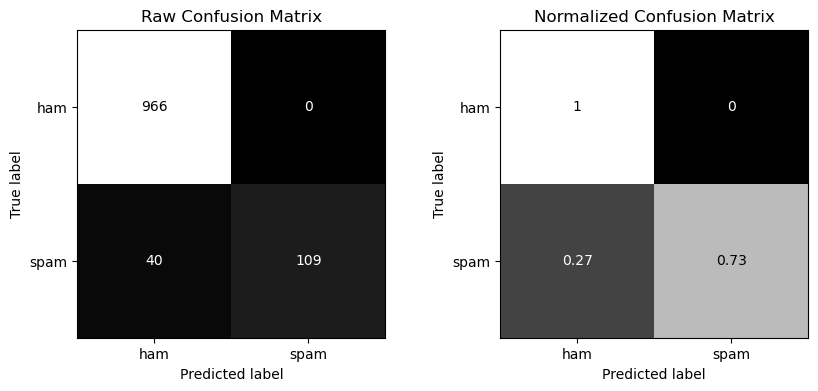

In [190]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot raw confusion matrix
disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp_raw.plot(ax=ax[0], colorbar=False,  cmap=plt.cm.gist_yarg_r)
ax[0].set_title('Raw Confusion Matrix')

# Compute and plot normalized confusion matrix
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=le.classes_).plot(ax=ax[1], colorbar= False,  cmap=plt.cm.gist_yarg_r)
ax[1].set_title('Normalized Confusion Matrix')

# Show the figure
plt.show()

False alarm is ideal (0%) but  
Missed alarm rate is significant (27%).

In [191]:
y_test.value_counts()

0    966
1    149
Name: cat_label, dtype: int64

We have no FP (actually ham predicted as spam)  
and 40 FN (actually spam predicted as ham.)  
It's a good result for such a simple model  
but after all we pass 40 spam messages to the user's inbox from 185 spam messages.

### Наивный Байесовский классификатор
train on CountVectorizer

In [204]:
df

,label,sms_message,cat_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [194]:
# df['label'] = df.label.map({'ham':0,'spam':1})

In [215]:
#Делим на трейновую и тестовую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], df['cat_label'], test_size=0.2, random_state=42)

In [227]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB # Multinomial Naive Bayes classifier for multinomial models

In [228]:
# Initialize the CountVectorizer
count_vector = CountVectorizer()

# Learn the vocabulary dictionary and return document-term matrix. 
train_tensor = count_vector.fit_transform(X_train).toarray()#.astype('float')

# Transform testing data and return the matrix. 
# Note we are NOT fitting BUT transforming the testing data into the CountVectorizer()
test_tensor = count_vector.transform(X_test).toarray()#.astype('float')


In [229]:
count_vector.get_feature_names_out()[-10:]   # get last 10 feature names of count vectorizer

array(['zeros', 'zhong', 'zindgi', 'zoe', 'zogtorius', 'zoom', 'zouk',
       'zyada', 'èn', 'ú1'], dtype=object)

In [230]:
count_vector.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [231]:
# shapes of the tensors (rows - number of messages, columns - number of terms(tokens) in the vocabulary)
# number of co
train_tensor.shape, test_tensor.shape

((4457, 7702), (1115, 7702))

In [232]:
# всего слов в предложениях (размер train словаря)
train_tensor.sum()

64307

In [233]:
spam_train_tensor = train_tensor[(y_train == 1).values]

# тензор с предложениями класса not_spam
not_spam_train_tensor = train_tensor[(y_train == 0).values]

In [234]:
# spam_train_tensor likely contains a count of how many times each word appears in a set of spam messages. The sum(axis=0) function is used to sum up the counts of each word across all spam messages, resulting in a 1D tensor with a length equal to the number of words in the dataset.

# Dividing this 1D tensor by the total count of words in the spam dataset (spam_train_tensor.sum()) 
# gives the probability of each word occurring in a spam message. 
# This is referred to as the "spam probability" of each word, denoted as p_w_spam.
#Вероятность слова при условии что предложение спам
p_w_spam = (spam_train_tensor.sum(axis=0)) / (spam_train_tensor.sum())

#Вероятность слова при условии что предложение не спам
p_w_not_spam = (not_spam_train_tensor.sum(axis=0)) / (not_spam_train_tensor.sum())



In [253]:
# вероятность, что любое сообщение спам
p_spam = (y_train == 1).values.sum() / len(y_train)

# вероятность, что любое сообщение не спам
p_not_spam = (y_train == 0).values.sum() / len(y_train)

p_spam, p_not_spam

(0.13417096701817366, 0.8658290329818263)

In [255]:
test_tensor.max(), test_tensor.min()

(15, 0)

In [256]:
test_tensor.shape

(1115, 7702)

In [251]:
#проверим на одном семпле
test_sample = test_tensor[0]

In [252]:
test_sample.shape, test_sample.max()

((7702,), 2)

In [258]:
test_sample = test_tensor[0]
test_sample

array([0, 0, 0, ..., 0, 0, 0])

In [240]:
# посчитает значение за спам 
np.log(p_spam) + (test_sample*np.log(p_w_spam+0.00000001)).sum()

-202.84623588556516

In [241]:
#посчитаем значение против спама
np.log(p_not_spam) + (test_sample*np.log(p_w_not_spam+0.00000001)).sum()

-135.87460246973149

In [242]:
# видно что значение против спама больше, чем значение за спам 
# соответственно значение не спам

In [243]:
#посчитаем для всей тестовой выборки

#размер тестовой выборки
test_tensor.shape

(1115, 7702)

In [244]:
#посчитаем предсказания как сравнение величинв за спам и против спама
y_pred = (np.log(p_spam) + (test_tensor*np.log(p_w_spam+0.00000001)).sum(axis=1)) >= \
 np.log(p_not_spam) + (test_tensor*np.log(p_w_not_spam+0.00000001)).sum(axis=1)

In [245]:
# предсказанные значения
y_pred.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [246]:
#истиные значение
y_test.to_numpy()

array([0, 0, 0, ..., 0, 0, 0])

In [247]:
#сравним реальные метки с предсказанными
test = (y_pred.astype(int) == y_test.to_numpy())

In [260]:
#посчитаем точность модели как отношение количество совпадений к размеру выборки  
test.sum()/test.shape[0]

0.9856502242152466

In [266]:
print('Lenear Regression (tf-idf) Report')
print(rep_lr)

Lenear Regression (tf-idf) Report
              precision    recall  f1-score   support

           0    0.96024   1.00000   0.97972       966
           1    1.00000   0.73154   0.84496       149

    accuracy                        0.96413      1115
   macro avg    0.98012   0.86577   0.91234      1115
weighted avg    0.96555   0.96413   0.96171      1115



In [267]:
print('Naiive Bayes Report (count vectorizer) Report')
print(classification_report(y_test.to_numpy(), y_pred.astype(int), digits=5))

Naiive Bayes Report (count vectorizer) Report
              precision    recall  f1-score   support

           0    0.98868   0.99482   0.99174       966
           1    0.96503   0.92617   0.94521       149

    accuracy                        0.98565      1115
   macro avg    0.97686   0.96050   0.96847      1115
weighted avg    0.98552   0.98565   0.98553      1115



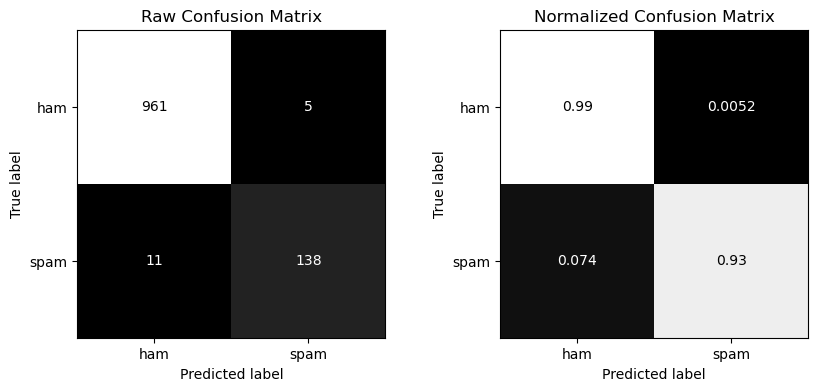

In [265]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot raw confusion matrix
disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp_raw.plot(ax=ax[0], colorbar=False,  cmap=plt.cm.gist_yarg_r)
ax[0].set_title('Raw Confusion Matrix')

# Compute and plot normalized confusion matrix
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=le.classes_).plot(ax=ax[1], colorbar= False,  cmap=plt.cm.gist_yarg_r)
ax[1].set_title('Normalized Confusion Matrix')

# Show the figure
plt.show()

False alarm is very low (0.5%)  
Missed alarm is good too (7.4%).

We managed to reduce the number of spam messages from 40 to 11 that filled our inbox. 
That's a pretty good result!

### Main takeaways:
<h4>NB (Naive Bayes) and LR (Logistic Regression) are both popular machine learning algorithms used for spam recognition.

Naive Bayes is a probabilistic algorithm that calculates the probability of an email being spam or not based on the occurrence of certain words or features in the email. It assumes that the occurrence of each feature is independent of the others, hence the "naive" assumption. Naive Bayes is a fast algorithm that works well with small datasets and can handle high-dimensional feature spaces.

Logistic Regression, on the other hand, is a statistical algorithm that predicts the probability of an email being spam or not based on the relationship between the dependent variable (spam or not) and the independent variables (features). It uses a sigmoid function to map any real-valued input to a value between 0 and 1, representing the probability of the email being spam. Logistic Regression is a versatile algorithm that can handle both linear and non-linear relationships between the variables.

In terms of performance, both algorithms can achieve high accuracy in spam recognition tasks. However, Naive Bayes may perform better with small datasets and high-dimensional feature spaces, while Logistic Regression may be more suitable for large datasets with non-linear relationships between variables.

Overall, the choice between NB and LR for spam recognition depends on the specific characteristics of the dataset and the goals of the task. It's always a good idea to try both algorithms and compare their performance on the given dataset.<h4>